In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import openpyxl
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import umap

In [3]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'
processed_dir = TOP + 'data/processed/'

In [4]:
df_chunk = pd.read_csv(interim_dir+'lri_elise_tps_df_011121.csv', chunksize=1000)

chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in df_chunk:  
    # perform data filtering 
    #chunk_filter = chunk_preprocessing(chunk)
    
    # Once the data filtering is done, append the chunk to list
    chunk_list.append(chunk)
    
# concat the list into dataframe 
lri_elise_tps = pd.concat(chunk_list)

In [5]:
lri_elise_tps.shape

(45485, 731)

In [7]:
lri_elise_tps.head()

,DTXSID,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,...,ring:polycycle_spiro_[2.2]pentane,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene,Source
0,DTXSID6020561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LRI
1,DTXSID9020453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LRI
2,DTXSID3034456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LRI
3,DTXSID2024242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LRI
4,DTXSID4032376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LRI


In [8]:
lri_elise_tps = lri_elise_tps.set_index('DTXSID')

In [9]:
lri_elise_tps.iloc[:,:729].head()

,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,bond:C#N_cyano_cyanohydrin,...,ring:polycycle_bicyclo_propene,ring:polycycle_spiro_[2.2]pentane,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene
DTXSID,,,,,,,,,,,,,,,,,,,,,
DTXSID6020561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID9020453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID3034456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID2024242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID4032376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#[e for e in lri_elise_tps.columns.tolist() if 'chain' in e]

In [10]:
reducer = umap.UMAP()

In [11]:
umap_features_tps = reducer.fit_transform(lri_elise_tps.iloc[:,:729].values)

/home/grace/anaconda3/envs/ttc_exclusions/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


In [12]:
umap_tp_df=pd.concat([pd.DataFrame(umap_features_tps, index = lri_elise_tps.index, columns = ['umap_x', 'umap_y']), lri_elise_tps.iloc[:,729]],axis =1)

In [13]:
umap_tp_df['alpha'] = np.where(umap_tp_df.Source == 'LRI', 0.3,1)

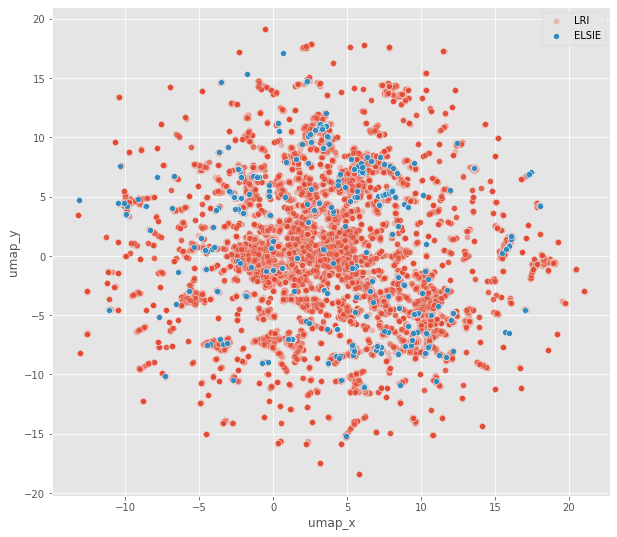

In [14]:
plt.style.use('ggplot')
plt.figure(figsize = (10,9))
alphas = umap_tp_df.alpha.sort_values().unique()
ax = sns.scatterplot(x="umap_x", y="umap_y",
                     data=umap_tp_df[umap_tp_df.alpha == alphas[0]], alpha=alphas[0], label = 'LRI')
for alpha in alphas[1:]:
    sns.scatterplot(x="umap_x", y="umap_y",
                    data=umap_tp_df[umap_tp_df.alpha == alpha], alpha=alpha, ax=ax,label = 'ELSIE')
plt.legend()
#plt.title('2D UMAP representation of the LRI and ELSIE datasets using ToxPrints')
plt.savefig(figures_dir+'TxP_UMAP_2D_Landscape_011121.png', dpi = 300)

In [28]:
umap_tp_df[(umap_tp_df['Source'] == 'ELSIE') & (umap_tp_df['umap_x'] >5) & (umap_tp_df['umap_x'] < 5.7) & (umap_tp_df['umap_y'] < 0) & (umap_tp_df['umap_y'] > -1)]

,umap_x,umap_y,Source,alpha
DTXSID,,,,
DTXSID0028030,5.607065,-0.894871,ELSIE,1.0
DTXSID0036479,5.444582,-0.996893,ELSIE,1.0


In [15]:
df_chunk1 = pd.read_csv(processed_dir+'lri_elsie_mgrn_011121.csv', chunksize=1000)

chunk_list1 = []  # append each chunk df here 

# Each chunk is in df format
for chunk in df_chunk1:  
    # perform data filtering 
    #chunk_filter = chunk_preprocessing(chunk)
    
    # Once the data filtering is done, append the chunk to list
    chunk_list1.append(chunk)
    
# concat the list into dataframe 
lri_elise_mgrn = pd.concat(chunk_list1)

In [16]:

lri_elise_mgrn = lri_elise_mgrn.set_index('Unnamed: 0')

In [17]:
lri_elise_mgrn.iloc[:,:2048].head()

,1,2,3,4,5,6,7,8,9,10,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
DTXSID6020561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID9020453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID3034456,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID2024242,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID4032376,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
umap_features2 = reducer.fit_transform(lri_elise_mgrn.iloc[:,:2048].values)

In [19]:
umap_df2 =pd.concat([pd.DataFrame(umap_features2, index = lri_elise_mgrn.index, columns = ['umap_x', 'umap_y']), lri_elise_mgrn.iloc[:,2048]],axis =1)

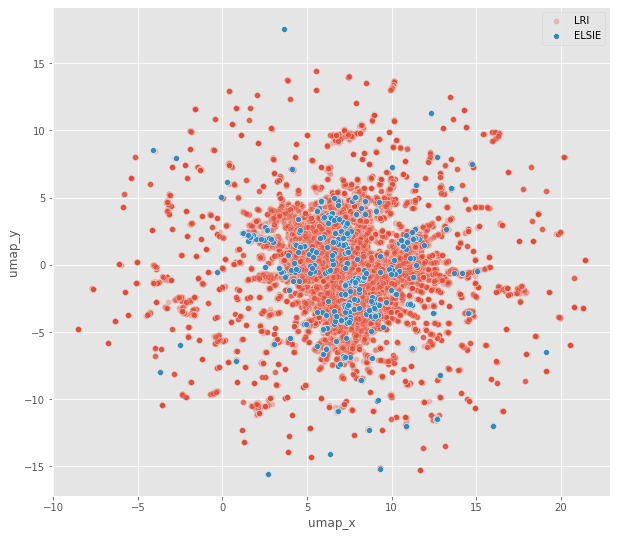

In [20]:
umap_df2['alpha'] = np.where(umap_df2.Source == 'LRI', 0.3,1)
plt.figure(figsize = (10,9))
alphas = umap_df2.alpha.sort_values().unique()
ax = sns.scatterplot(x="umap_x", y="umap_y",
                     data=umap_df2[umap_df2.alpha == alphas[0]], alpha=alphas[0], label = 'LRI')
for alpha in alphas[1:]:
    sns.scatterplot(x="umap_x", y="umap_y",
                    data=umap_df2[umap_df2.alpha == alpha], alpha=alpha, ax=ax,label = 'ELSIE')
plt.legend()

plt.savefig(figures_dir+'Mrgn_UMAP_2D_Landscape_011121.png', dpi = 300)

In [31]:
umap_df2[umap_df2.index == 'DTXSID0028030']

,umap_x,umap_y,Source,alpha
Unnamed: 0,,,,
DTXSID0028030,2.517264,-0.147833,LRI,0.3
DTXSID0028030,2.518347,-0.147137,ELSIE,1.0


ToxPrint enrichment analysis

In [35]:
import scipy.stats as stats

In [36]:
df = pd.get_dummies(lri_elise_tps, columns=['Source'])

In [37]:
df.iloc[:,:-2].head()
#df.iloc[:,-1].head()

,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,bond:C#N_cyano_cyanohydrin,...,ring:polycycle_bicyclo_propene,ring:polycycle_spiro_[2.2]pentane,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene
DTXSID,,,,,,,,,,,,,,,,,,,,,
DTXSID6020561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID9020453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID3034456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID2024242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID4032376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#df.iloc[:,-2]

In [42]:
pd.crosstab(df.iloc[:,-1], df['ring:fused_steroid_generic_[5_6_6_6]'])

ring:fused_steroid_generic_[5_6_6_6],0.0,1.0
Source_LRI,,
0,447,0
1,43776,1262


In [43]:
res_txp = []
for i, column in df.iloc[:,:-2].iteritems():
    if pd.crosstab(df.iloc[:,-1], column).shape == (2,2):
        a = pd.crosstab(df.iloc[:,-1], column)
        tn, fp, fn, tp = a.iloc[0,0], a.iloc[0,1], a.iloc[1,0], a.iloc[1,1]
        tested_active = (tp + fn)
        oddsratio, pvalue = stats.fisher_exact(a)
        res_txp.append([oddsratio, pvalue, i, tp, fn, fp, tn, tested_active])

In [44]:
pd.DataFrame(res_txp).head()

,0,1,2,3,4,5,6,7
0,inf,1.000000e+00,atom:element_main_group,1,45037,0,447,45038
1,4.578473,3.415419e-06,atom:element_metal_group_I_II,2641,42397,6,441,45038
2,inf,1.000000e+00,atom:element_metal_group_III,7,45031,0,447,45038
3,0.186650,1.905864e-11,atom:element_metal_metalloid,534,44504,27,420,45038
4,0.257191,9.882817e-02,atom:element_metal_poor_metal,52,44986,2,445,45038


In [45]:
def convert(lst):
    df2 = pd.DataFrame(lst, columns = ['OR', 'p', 'TxP' ,'TP', 'FN', 'FP', 'TN', 'Tested_Active'])
    df2 = df2.sort_values(by=['OR','p'], ascending = [False, True])
    return df2

In [46]:
df_enrich = convert(res_txp)

In [47]:
df_enrich

,OR,p,TxP,TP,FN,FP,TN,Tested_Active
399,inf,9.692305e-13,group:aminoAcid_aminoAcid_generic,2764,42274,0,447,45038
531,inf,2.602599e-08,ring:hetero_[6]_N_diazine_(1_3-)_generic,1793,43245,0,447,45038
436,inf,6.062989e-08,group:ligand_path_4_bidentate_aminoacetate,1730,43308,0,447,45038
547,inf,6.309923e-08,ring:hetero_[6]_O_pyran_generic,1738,43300,0,447,45038
190,inf,4.200334e-07,bond:N(=O)_nitro_C,1513,43525,0,447,45038
...,...,...,...,...,...,...,...,...
475,0.031020,1.317018e-07,ring:fused_PAH_acenaphthylene,19,45019,6,441,45038
295,0.009903,1.955847e-02,bond:metal_group_III_other_generic,1,45037,1,446,45038
293,0.000000,9.827416e-03,bond:metal_group_III_other_Al_generic,0,45038,1,446,45038
294,0.000000,9.827416e-03,bond:metal_group_III_other_Al_oxy,0,45038,1,446,45038


In [48]:
df_enriched = df_enrich[(df_enrich['OR'] >= 3) & (df_enrich['p'] < 0.05 ) & (df_enrich['TP'] >=3)]

In [49]:
df_enriched.shape

(110, 8)

In [50]:
df_enriched

,OR,p,TxP,TP,FN,FP,TN,Tested_Active
399,inf,9.692305e-13,group:aminoAcid_aminoAcid_generic,2764,42274,0,447,45038
531,inf,2.602599e-08,ring:hetero_[6]_N_diazine_(1_3-)_generic,1793,43245,0,447,45038
436,inf,6.062989e-08,group:ligand_path_4_bidentate_aminoacetate,1730,43308,0,447,45038
547,inf,6.309923e-08,ring:hetero_[6]_O_pyran_generic,1738,43300,0,447,45038
190,inf,4.200334e-07,bond:N(=O)_nitro_C,1513,43525,0,447,45038
...,...,...,...,...,...,...,...,...
159,3.446709,1.578659e-02,bond:CX_halide_alkyl-X_primary,1025,44013,3,444,45038
557,3.405583,1.209608e-16,ring:hetero_[6]_Z_generic,10348,34690,36,411,45038
93,3.295478,5.140259e-09,bond:CN_amine_aromatic_generic,5471,39567,18,429,45038
515,3.030011,1.747178e-07,ring:hetero_[5]_Z_1-Z,4818,40220,17,430,45038


In [51]:
res_txp1 = []
for i, column in df.iloc[:,:-2].iteritems():
    if pd.crosstab(df.iloc[:,-2], column).shape == (2,2):
        a = pd.crosstab(df.iloc[:,-2], column)
        tn, fp, fn, tp = a.iloc[0,0], a.iloc[0,1], a.iloc[1,0], a.iloc[1,1]
        tested_active = (tp + fn)
        oddsratio, pvalue = stats.fisher_exact(a)
        res_txp1.append([oddsratio, pvalue, i, tp, fn, fp, tn, tested_active])

In [52]:
elise_enrich = convert(res_txp1)

In [53]:
elise_enriched = elise_enrich[(elise_enrich['OR'] >= 3) & (elise_enrich['p'] < 0.05 ) & (elise_enrich['TP'] >=3)]

In [54]:
elise_enriched.shape

(33, 8)

In [55]:
elise_enriched.head()

,OR,p,TxP,TP,FN,FP,TN,Tested_Active
475,32.237021,1.317018e-07,ring:fused_PAH_acenaphthylene,6,441,19,45019,447
298,14.632669,2.486157e-21,bond:metal_metalloid_alkylSiloxane,27,420,197,44841,447
309,12.861161,5.058913e-20,bond:metal_metalloid_Si_oxy,27,420,224,44814,447
482,12.415020,8.817535e-05,ring:fused_PAH_pyrene,5,442,41,44997,447
244,10.220000,1.123260e-05,bond:PO_phosphine_oxy_generic,7,440,70,44968,447


In [68]:
#pd.crosstab(df.iloc[:,-2], df['group:aminoAcid_aminoAcid_generic'])

In [56]:
writer = pd.ExcelWriter(processed_dir+'enrichments_LRI_ELSIE_011121.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.

df_enriched.to_excel(writer, sheet_name = 'LRI_enriched_TxPs')
elise_enriched.to_excel(writer, sheet_name = 'ELSIE_enriched_TxPs')

writer.save()


Overlap in datasets

In [57]:
df[df['Source_ELSIE'] ==1].index

Index(['DTXSID4029355', 'DTXSID4020240', 'DTXSID0021961', 'DTXSID6027428',
       'DTXSID2021781', 'DTXSID8022163', 'DTXSID8020204', 'DTXSID6044355',
       'DTXSID1025809', 'DTXSID7021780',
       ...
       'DTXSID2021315', 'DTXSID30871129', 'DTXSID2021604', 'DTXSID2025505',
       'DTXSID7059274', 'DTXSID0022143', 'NODTXSID_114123738',
       'NODTXSID_114123749', 'DTXSID7021360', 'DTXSID7027625'],
      dtype='object', name='DTXSID', length=447)

In [58]:
df[df['Source_LRI'] ==1].index

Index(['DTXSID6020561', 'DTXSID9020453', 'DTXSID3034456', 'DTXSID2024242',
       'DTXSID4032376', 'DTXSID7024299', 'DTXSID3021431', 'DTXSID2036293',
       'DTXSID7021235', 'DTXSID8021434',
       ...
       'DTXSID70274514', 'DTXSID80446285', 'DTXSID80449539', 'DTXSID00230087',
       'DTXSID3020209', 'DTXSID6023864', 'DTXSID9022360', 'DTXSID4034940',
       'DTXSID7023980', 'DTXSID9034868'],
      dtype='object', name='DTXSID', length=45038)

In [59]:
len(set(df[df['Source_LRI'] ==1].index).intersection(set(df[df['Source_ELSIE'] ==1].index)))

351

In [60]:
unique = [e for e in df[df['Source_ELSIE'] ==1].index.tolist() if e not in df[df['Source_LRI'] ==1].index.tolist()]

In [61]:
len(unique)

87

In [62]:
pd.Series(unique).to_csv(processed_dir+'unique_ELSIE.csv')

In [63]:
elsie_txps = df[df['Source_ELSIE']==1]

In [64]:
elsie_81 = elsie_txps[elsie_txps.index.isin(unique)]

In [65]:
elsie81 = elsie_81[elsie_81.columns[elsie_81.max() >= 1]]

In [66]:
elsie81.columns

Index(['atom:element_metal_group_I_II', 'atom:element_metal_metalloid',
       'atom:element_metal_poor_metal', 'atom:element_metal_transistion_metal',
       'bond:C(~Z)~C~Q_haloether_dibenzodioxin_1-halo',
       'bond:C(~Z)~C~Q_haloether_dibenzodioxin_2-halo',
       'bond:C(=O)N_carboxamide_(NHR)', 'bond:C(=O)N_carboxamide_generic',
       'bond:C(=O)O_acidAnhydride', 'bond:C(=O)O_carboxylicAcid_alkyl',
       ...
       'ring:hetero_[6]_O_dioxane_(1_4-)_generic', 'ring:hetero_[6]_Z_1-',
       'ring:hetero_[6]_Z_1_3_5-', 'ring:hetero_[6]_Z_1_4-',
       'ring:hetero_[6]_Z_generic', 'ring:hetero_[6_5_6]_O_benzofuran_dibenzo',
       'ring:hetero_[6_6]_O_benzodioxin_(1_4-)', 'ring:hetero_[6_6]_Z_generic',
       'ring:polycycle_bicyclo_[2.1.1]heptane', 'Source_ELSIE'],
      dtype='object', length=173)

In [67]:
[e for e in elise_enriched['TxP'].tolist() if e in elsie81.columns]

['bond:metal_metalloid_alkylSiloxane',
 'bond:metal_metalloid_Si_oxy',
 'bond:PO_phosphine_oxy_generic',
 'bond:metal_metalloid_oxy',
 'chain:oxy-alkaneLinear_ethyleneOxide_EO2',
 'bond:metal_metalloid_Si_organo',
 'bond:C(~Z)~C~Q_haloether_dibenzodioxin_2-halo',
 'chain:oxy-alkaneLinear_ethyleneOxide_EO3',
 'bond:metal_metalloid_Si_generic',
 'chain:alkaneBranch_t-butyl_C4',
 'chain:aromaticAlkane_Ar-C_meta',
 'ring:hetero_[6_5_6]_O_benzofuran_dibenzo',
 'atom:element_metal_metalloid',
 'chain:alkaneLinear_stearyl_C18',
 'chain:oxy-alkaneLinear_ethylenOxide_EO1(O)',
 'chain:oxy-alkaneLinear_ethyleneOxide_EO1',
 'chain:alkaneLinear_hexadecyl_C16',
 'chain:alkaneLinear_tetradecyl_C14',
 'ring:hetero_[6]_N_triazine_(1_3_5-)',
 'bond:OZ_oxide_peroxy',
 'ring:hetero_[6]_Z_1_3_5-']

In [68]:
elise =pd.read_excel(raw_dir+'ELISE_270919.xlsx', sheet_name = 'ELISE_updated')

In [69]:
elise.shape

(503, 10)

In [76]:
elise[elise['DTXSID'].isin(unique)].shape

(84, 10)

In [77]:
elise_v1 = elise[~elise['SMILES'].isnull()]

In [78]:
elise_v1.shape

(453, 10)

In [81]:
elise_v1[elise_v1['DTXSID'].isin(unique)]

,Name,CAS Number,CAS_corrected,INPUT,FOUND_BY,DTXSID,PREFERRED_NAME,CASRN,SMILES,QSAR_READY_SMILES
8,Oleic acid,112-80-1,112-80-1,112-80-1,CAS-RN,DTXSID1025809,Oleic acid,112-80-1,CCCCCCCC\C=C/CCCCCCCC(O)=O,CCCCCCCCC=CCCCCCCCC(O)=O
10,Irgafos 168 Phosphate,95906-11-9,95906-11-9,95906-11-9,CAS-RN,DTXSID20893779,"Tris(2,4-di-tert-butylphenyl) phosphate",95906-11-9,CC(C)(C)C1=CC(=C(OP(=O)(OC2=C(C=C(C=C2)C(C)(C)...,CC(C)(C)C1=CC(=C(OP(=O)(OC2=C(C=C(C=C2)C(C)(C)...
11,Irgafos PEPQ,38613-77-3,38613-77-3,38613-77-3,CAS-RN,DTXSID10894018,"4,4'-Biphenylenediphosphonous acid tetrakis(2,...",38613-77-3,CC(C)(C)C1=CC(=C(OP(OC2=CC=C(C=C2C(C)(C)C)C(C)...,CC(C)(C)C1=CC(=C(OP(OC2=CC=C(C=C2C(C)(C)C)C(C)...
14,Calcium stearate,1592-23-0,1592-23-0,1592-23-0,CAS-RN,DTXSID7027419,"Octadecanoic acid, calcium salt",1592-23-0,[Ca++].CCCCCCCCCCCCCCCCCC([O-])=O.CCCCCCCCCCCC...,NaN
21,Irganox 1010,6683-19-8,6683-19-8,6683-19-8,CAS-RN,DTXSID1027633,Irganox 1010,6683-19-8,CC(C)(C)C1=CC(CCC(=O)OCC(COC(=O)CCC2=CC(=C(O)C...,CC(C)(C)C1=CC(CCC(=O)OCC(COC(=O)CCC2=CC(=C(O)C...
...,...,...,...,...,...,...,...,...,...,...
488,Polychlorinated dibenzo-p-dioxins,NaN,NaN,54589-71-8,CAS-RN,DTXSID80203017,"2,4,8-Trichlorodibenzofuran",54589-71-8,ClC1=CC2=C(OC3=C2C=C(Cl)C=C3Cl)C=C1,NaN
489,Polychlorinated dibenzo-p-dioxins,NaN,NaN,67028-17-5,CAS-RN,DTXSID80217290,"1,3,7-Trichlorodibenzo-p-dioxin",67028-17-5,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C=C3Cl)C=C1,NaN
493,"Linoleic Acid 9, 12-Octadecadienoic acid (9Z, ...",60-33-3,NaN,60-33-3,CAS-RN,DTXSID2025505,Linoleic acid,60-33-3,CCCCC\C=C/C\C=C/CCCCCCCC(O)=O,NaN
499,"cis-1,1,5,5-tetramethyl-2-(1-methylethenyl)-3-...",114123-73-8,NaN,114123-73-8,NO_MATCH,NODTXSID_114123738,"Cyclohexane,1,1,5,5-tetramethyl-2-(1-methyleth...",114123-73-8,[C@H]1([C@@H](CC(CC1(C)C)(C)C)CC(C)(C)CC(C)C)C...,[C@H]1([C@@H](CC(CC1(C)C)(C)C)CC(C)(C)CC(C)C)C...


In [82]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [83]:
nms=[x[0] for x in Descriptors._descList]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(nms)



In [87]:
elise_dict ={k:Chem.MolFromSmiles(v) for k,v in zip(elise_v1['DTXSID'],elise_v1['SMILES'])}

In [88]:
elise_dict_v1 = {k: v for k, v in elise_dict.items() if v is not None}

In [90]:
#elise_dict_v1

In [97]:
des = {}
for k,v in elise_dict_v1.items():
    descrs = calc.CalcDescriptors(v)
    des[k] = list(descrs)

In [99]:
des_df = pd.DataFrame(list(des.items()))

In [100]:
des_df.columns = ['DTXSID', 'D']

In [104]:
des_df = pd.concat([des_df.DTXSID, pd.DataFrame(des_df['D'].tolist(), columns=nms)], axis = 1)

In [106]:
des_df[des_df['DTXSID'].isin(unique)].to_csv(processed_dir+'elise_unique_des_011121.csv')

In [107]:
des_df.to_csv(processed_dir+'elise_all_des_011121.csv')

In [122]:
des_df_v1 = des_df[des_df['DTXSID'].isin(unique)].merge(elise_v1, on = 'DTXSID')

In [123]:
des_df_v1.to_csv(processed_dir+'elise_unique_des_011121.csv')

In [127]:
des_df_v1[
['DTXSID',
'Name',
 'CAS Number ',
 'CAS_corrected',
 'INPUT',
 'FOUND_BY',
 'PREFERRED_NAME',
 'CASRN',
 'SMILES',
 'QSAR_READY_SMILES',
'MolWt',
'NHOHCount',
 'NOCount',
 'NumAliphaticCarbocycles',
 'NumAliphaticHeterocycles',
 'NumAliphaticRings',
 'NumAromaticCarbocycles',
 'NumAromaticHeterocycles',
 'NumAromaticRings',
 'NumHAcceptors',
 'NumHDonors',
 'NumHeteroatoms',
 'NumRotatableBonds',
 'NumSaturatedCarbocycles',
 'NumSaturatedHeterocycles',
 'NumSaturatedRings',
 'RingCount',
 'MolLogP',
 'MolMR',
    'TPSA']]
    

,DTXSID,Name,CAS Number,CAS_corrected,INPUT,FOUND_BY,PREFERRED_NAME,CASRN,SMILES,QSAR_READY_SMILES,...,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,TPSA
0,DTXSID1025809,Oleic acid,112-80-1,112-80-1,112-80-1,CAS-RN,Oleic acid,112-80-1,CCCCCCCC\C=C/CCCCCCCC(O)=O,CCCCCCCCC=CCCCCCCCC(O)=O,...,1,2,15,0,0,0,0,6.1085,87.0878,37.30
1,DTXSID20893779,Irgafos 168 Phosphate,95906-11-9,95906-11-9,95906-11-9,CAS-RN,"Tris(2,4-di-tert-butylphenyl) phosphate",95906-11-9,CC(C)(C)C1=CC(=C(OP(=O)(OC2=C(C=C(C=C2)C(C)(C)...,CC(C)(C)C1=CC(=C(OP(=O)(OC2=C(C=C(C=C2)C(C)(C)...,...,0,5,6,0,0,0,3,13.1165,201.0165,44.76
2,DTXSID10894018,Irgafos PEPQ,38613-77-3,38613-77-3,38613-77-3,CAS-RN,"4,4'-Biphenylenediphosphonous acid tetrakis(2,...",38613-77-3,CC(C)(C)C1=CC(=C(OP(OC2=CC=C(C=C2C(C)(C)C)C(C)...,CC(C)(C)C1=CC(=C(OP(OC2=CC=C(C=C2C(C)(C)C)C(C)...,...,0,6,11,0,0,0,6,19.9240,322.8660,36.92
3,DTXSID7027419,Calcium stearate,1592-23-0,1592-23-0,1592-23-0,CAS-RN,"Octadecanoic acid, calcium salt",1592-23-0,[Ca++].CCCCCCCCCCCCCCCCCC([O-])=O.CCCCCCCCCCCC...,NaN,...,0,5,32,0,0,0,0,9.6148,174.8600,80.26
4,DTXSID1027633,Irganox 1010,6683-19-8,6683-19-8,6683-19-8,CAS-RN,Irganox 1010,6683-19-8,CC(C)(C)C1=CC(CCC(=O)OCC(COC(=O)CCC2=CC(=C(O)C...,CC(C)(C)C1=CC(CCC(=O)OCC(COC(=O)CCC2=CC(=C(O)C...,...,4,12,20,0,0,0,4,15.8792,341.5802,186.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,DTXSID80203017,Polychlorinated dibenzo-p-dioxins,NaN,NaN,54589-71-8,CAS-RN,"2,4,8-Trichlorodibenzofuran",54589-71-8,ClC1=CC2=C(OC3=C2C=C(Cl)C=C3Cl)C=C1,NaN,...,0,4,0,0,0,0,3,5.5462,68.7500,13.14
80,DTXSID80217290,Polychlorinated dibenzo-p-dioxins,NaN,NaN,67028-17-5,CAS-RN,"1,3,7-Trichlorodibenzo-p-dioxin",67028-17-5,ClC1=CC2=C(OC3=C(O2)C=C(Cl)C=C3Cl)C=C1,NaN,...,0,5,0,0,0,0,3,5.5448,68.0620,18.46
81,DTXSID2025505,"Linoleic Acid 9, 12-Octadecadienoic acid (9Z, ...",60-33-3,NaN,60-33-3,CAS-RN,Linoleic acid,60-33-3,CCCCC\C=C/C\C=C/CCCCCCCC(O)=O,NaN,...,1,2,14,0,0,0,0,5.8845,86.9938,37.30
82,NODTXSID_114123738,"cis-1,1,5,5-tetramethyl-2-(1-methylethenyl)-3-...",114123-73-8,NaN,114123-73-8,NO_MATCH,"Cyclohexane,1,1,5,5-tetramethyl-2-(1-methyleth...",114123-73-8,[C@H]1([C@@H](CC(CC1(C)C)(C)C)CC(C)(C)CC(C)C)C...,[C@H]1([C@@H](CC(CC1(C)C)(C)C)CC(C)(C)CC(C)C)C...,...,0,0,5,1,0,1,1,7.1035,96.4430,0.00


In [129]:
des_df_all = des_df.merge(elise_v1, on = 'DTXSID')

In [131]:
des_df_all['Unique'] = des_df_all['DTXSID'].apply(lambda x : 1 if x in unique else 0)

In [137]:
des_df_all.to_csv(processed_dir+'elise_all_des_011121.csv')

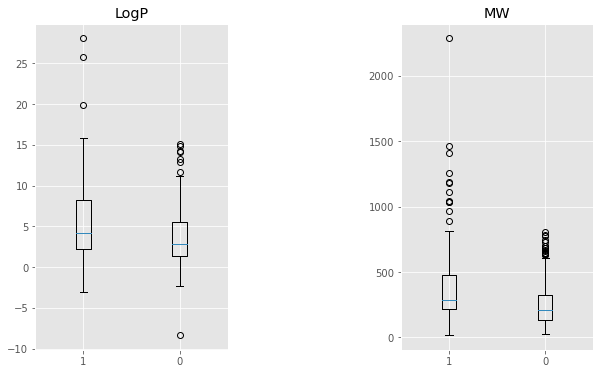

In [136]:
labels = [1,0]
fig, (ax1, ax2) = plt.subplots(nrows = 1,ncols = 2, figsize = (10,6))
fig.subplots_adjust(hspace = 0.2, wspace = 0.9)
ax1.boxplot([des_df_all[des_df_all['Unique'] == 1]['MolLogP'], des_df_all[des_df_all['Unique'] == 0]['MolLogP']], labels = labels)
ax2.boxplot([des_df_all[des_df_all['Unique'] == 1]['MolWt'], des_df_all[des_df_all['Unique'] == 0]['MolWt']], labels = labels)
ax1.set_title('LogP')
ax2.set_title('MW')
fig.savefig(figures_dir+'boxplot_LogP_MW_ELSIE.png');